In [8]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

print(tf.__version__)

Num GPUs Available:  1
2.17.1


In [9]:
# import basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
## divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [12]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [14]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [15]:
#feature engineering for handling categorical features
geography= pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [16]:
#concatenate these variables with dataframe
X= X.drop(['Geography','Gender'],axis=1)

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [18]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [19]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [20]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [21]:
X_train.shape

(8000, 11)

In [22]:
X_test.shape

(2000, 11)

In [23]:
#part 2 Now lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [24]:
##lets inialize the ANN
classifier = Sequential()

In [25]:
#adding the input layer
classifier.add(Dense(units=11,activation='relu'))
#since 11 inputs

In [26]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
# there is a formula to choose number of units  hidden layers
#r8 now we are taking random

In [44]:
#adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
#classifier.add(Dropout(0.2))  can add dropout layer

In [28]:
#adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [31]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [32]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [33]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50,callbacks=early_stopping)
# dataset = 10,000 --- training data - 8000 , testing data - 2000, nonvalidation data = 8000*0.67 = 5360
# iteration = 5360/10 = 536


Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8057 - loss: 0.4518 - val_accuracy: 0.8141 - val_loss: 0.3977
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8123 - loss: 0.3798 - val_accuracy: 0.8410 - val_loss: 0.3760
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8564 - loss: 0.3456 - val_accuracy: 0.8379 - val_loss: 0.3673
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8502 - loss: 0.3555 - val_accuracy: 0.8379 - val_loss: 0.3846
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8534 - loss: 0.3496 - val_accuracy: 0.8493 - val_loss: 0.3636
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8661 - loss: 0.3313 - val_accuracy: 0.8493 - val_loss: 0.3607
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8682 - loss: 0.3249 - val_accuracy: 0.8519 - val_loss: 0.3660
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8616 - loss: 0.3319 - val_accuracy: 0.

In [34]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

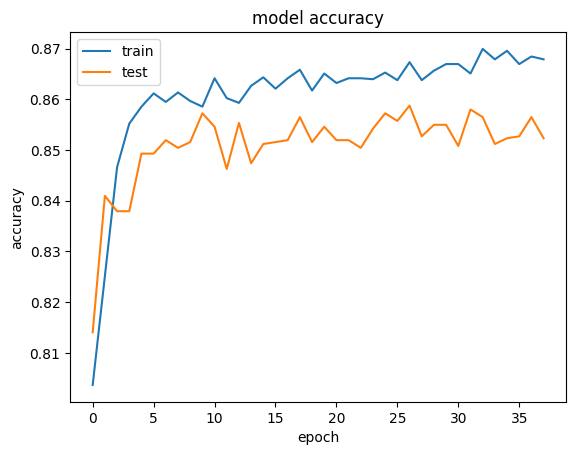

In [36]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

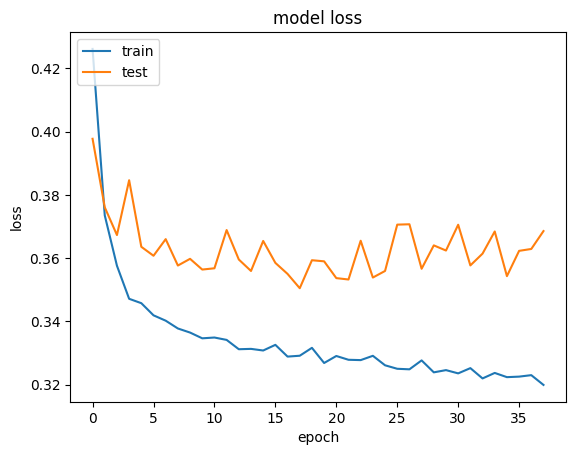

In [37]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
#part 3 making the prediction and evaluating the model

#predicting the test set result
y_pred=classifier.predict(X_test)
y_pred= (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [40]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1534,   61],
       [ 213,  192]])

In [41]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred,y_test)
score

0.863

In [43]:
#get the weights
classifier.get_weights()

[array([[-0.05575402,  1.2738128 , -0.7929047 ,  0.6745441 , -0.03832498,
         -1.1541154 ,  0.15795714, -1.1657057 ,  0.2018852 ,  0.0239873 ,
         -0.6342694 ],
        [ 1.1378382 , -2.3535967 , -1.9745303 ,  0.46178913,  0.4896918 ,
         -2.16951   ,  3.2351334 ,  1.8798811 ,  2.729788  , -1.6246787 ,
          1.4270974 ],
        [ 0.10077499,  0.19257039, -0.6599278 ,  0.2222025 ,  0.23474315,
          0.12702826, -0.15111734,  0.13494805,  0.1608706 ,  0.7515184 ,
          1.253512  ],
        [ 0.26718172, -1.311879  ,  0.97079915, -2.1670618 , -2.7641354 ,
         -1.3114376 ,  0.76854366, -0.9753768 , -0.5024963 , -1.3609525 ,
         -1.2430513 ],
        [ 3.1704562 , -0.4058016 ,  1.4297752 ,  0.03258305, -3.190692  ,
          1.1678126 , -1.4897946 , -0.768098  , -0.0215928 , -1.0586396 ,
         -0.17118865],
        [-0.29645568,  0.8412066 ,  1.1113832 , -0.2244941 ,  0.10263249,
         -0.6781466 , -0.01897107, -0.30356514, -0.3082427 , -0.7112824